## 미분계수 (derivative)
> 한 점에서 변화율 구하기

[참고](https://www.geogebra.org/m/TymMwUtc)

함수 $y=f(x)$ 위에 한 점 $x=2$에서 미분계수는 $\Large\lim\limits_{h \rightarrow 0}\frac{f(2+h)-f(2)}{h}$

---

$f(x)=3x^2-4x+5$ 예시

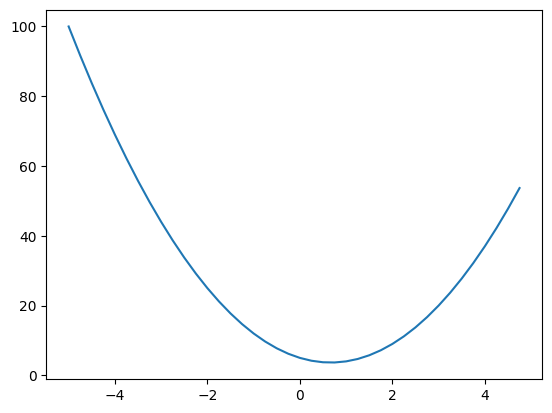

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*x**2 - 4*x + 5
    
xs = np.arange(-5,5,0.25)
ys = f(xs)


plt.plot(xs, ys)

In [ ]:
h = 0.0000001
x = 2

(f(x+h)-f(x))/h

8.000000288888032

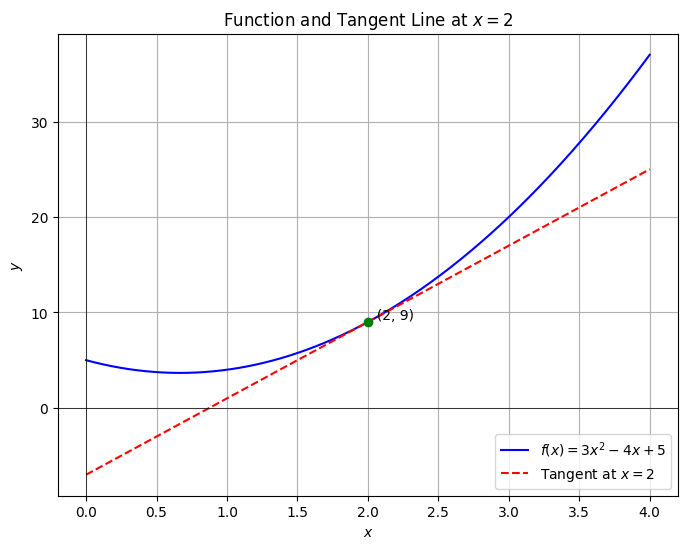

In [ ]:
# gpt로 만든 코드입니다...
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return 3 * x**2 - 4 * x + 5

# Define the derivative of the function
def f_prime(x):
    return 6 * x - 4

# Point of tangency
x_tangent = 2
y_tangent = f(x_tangent)
slope = f_prime(x_tangent)

# Define the tangent line function
def tangent_line(x):
    return slope * (x - x_tangent) + y_tangent

# Generate x values for plotting
x_values = np.linspace(0, 4, 400)
y_values = f(x_values)
tangent_values = tangent_line(x_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = 3x^2 - 4x + 5$', color='blue')
plt.plot(x_values, tangent_values, label='Tangent at $x = 2$', color='red', linestyle='--')
plt.scatter(x_tangent, y_tangent, color='green', zorder=5)  # Point of tangency
plt.text(x_tangent, y_tangent, f'  ({x_tangent}, {y_tangent})', verticalalignment='bottom')

# Add labels and title
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Function and Tangent Line at $x = 2$')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


## 도함수 (derivative)
> 모든 점에 대한 미분계수를 미리 계산해놓은 함수

$f(x)=3x^2-4x+5$를 미분하면

$\Large\frac{df(x)}{dx}=f^\prime(x)=6x-4$

이 도함수에 2를 넣으면 8이 나오겠죠?

$f^\prime(2)=12-4=8$

## 입력 변수 여러개일 때 미분계수
> 입력 변수 하나를 기준으로 미분계수 구할 수 있음

$f(a,b,c)$ 위의 한 점 $a=2$, $b=-3$, $c=10$에서 

c 방향 미분계수는 $\Large\lim\limits_{h \rightarrow 0}\frac{f(2,\ -3,\ 10+h)-f(2,\ -3,\ 10)}{h}$

---

$f(a,b,c) = ab+c$ 예시

In [ ]:
h = 0.0001

a=2.0
b=-3.0
c=10.0

def f(a,b,c):
    return a*b + c

print((f(a,b,c+h)-f(a,b,c))/h)

0.9999999999976694


## 편미분 (partial derivative)
> 원하는 입력 변수 하나를 기준으로 도함수 구하기

$f(a,b,c) = ab+c$이고 c 방향으로 편미분하면

$\Large\frac{\partial f(a,b,c)}{\partial c} = 1$

$a=2$, $b=-3$, $c=10$를 대입해도 1


## 연쇄 법칙 (chain rule)
> 합성 함수에서 미분값 구하기

$y=f(g(x))$일 때,   
$y=f(u)$, $u=g(x)$라 하면,  

$\Large\frac{dy}{dx}=\frac{dy}{du}\frac{du}{dx}$

---

$y=2u^2 - 7u + 3$이고 $u=6x+1$이면

$\Large\frac{dy}{du}=4u-7$

$\Large\frac{du}{dx}=6$

$\Large\frac{dy}{dx}=\frac{dy}{du}\frac{du}{dx}=(4u-7)\times 6$

$x=5$에서 미분한다면?!

$u=6\times 5 + 1 = 31$

$\Large\frac{dy}{dx}=(4\times 31 -7)\times 6=702$

In [ ]:
h = 0.0001
def g(x):
    return 6*x + 1

def f(u):
    return 2*u**2 - 7*u + 3


(f(g(5+h)) - f(g(5))) / h

702.0000089141831

## 매직 메서드 (magic method)
> 파이썬 클래스 메서드 중 특정 동작을 지원

함수 이름이 `__`로 시작해서 `__`로 끝납니다

예를 들어
- `__init__`
- `__repr__`
- `__add__`

In [ ]:
# 수업 때 계속 다룰 Value 클래스!
# 이런게 있다~ 하고 보셔요ㅎㅎ
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data

        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f'Value({self.data})'
    
    def __add__(self, other):
        return Value(self.data+other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

### init (생성자)
> 클래스와 클래스 내부 변수, 함수를 초기화할 때 사용


In [ ]:
class C:
    def __init__(self, parameter):
        self.data = parameter

c1 = C(123)

In [ ]:
c1

In [ ]:
c1.data

123

### repr
> 클래스 인스턴스 `print`했을 때 나타나는 글자 정할 때 사용

In [ ]:
class C:
    def __init__(self, parameter):
        self.data = parameter
    
    def __repr__(self):
        return f'클래스 C (데이터 = {self.data})'

c1 = C(123)
print(c1)

클래스 C (데이터 = 123)


## 연산자 오버로딩 (operator overloading)
> 내맘대로 연산 기호 동작을 바꿀 수 있다!

In [ ]:
c1 = C(123)
c2 = C(234)

c1+c2

TypeError: unsupported operand type(s) for +: 'C' and 'C'

In [ ]:
class C:
    def __init__(self, parameter):
        self.data = parameter
    
    def __add__(self, other):
        return self.data + other.data

c1 = C(123)
c2 = C(234)

c1+c2

357